# Snapchat Political Ads
This project uses political ads data from Snapchat, a popular social media app. Interesting questions to consider include:
- What are the most prevalent organizations, advertisers, and ballot candidates in the data? Do you recognize any?
- What are the characteristics of ads with a large reach, i.e., many views? What may a campaign consider when maximizing an ad's reach?
- What are the characteristics of ads with a smaller reach, i.e., less views? Aside from funding constraints, why might a campaign want to produce an ad with a smaller but more targeted reach?
- What are the characteristics of the most expensive ads? If a campaign is limited on advertising funds, what type of ad may the campaign consider?
- What groups or regions are targeted frequently? (For example, for single-gender campaigns, are men or women targeted more frequently?) What groups or regions are targeted less frequently? Why? Does this depend on the type of campaign?
- Have the characteristics of ads changed over time (e.g. over the past year)?
- When is the most common local time of day for an ad's start date? What about the most common day of week? (Make sure to account for time zones for both questions.)

### Getting the Data
The data and its corresponding data dictionary is downloadable [here](https://www.snap.com/en-US/political-ads/). Download both the 2018 CSV and the 2019 CSV. 

The CSVs have the same filename; rename the CSVs as needed.

Note that the CSVs have the exact same columns and the exact same data dictionaries (`readme.txt`).

### Cleaning and EDA
- Concatenate the 2018 CSV and the 2019 CSV into one DataFrame so that we have data from both years.
- Clean the data.
    - Convert `StartDate` and `EndDate` into datetime. Make sure the datetimes are in the correct time zone. You can use whatever timezone (e.g. UTC) you want as long as you are consistent. However, if you want to answer a question like "When is the most common local time of day for an ad's start date," you will need to convert timezones as needed. See Hint 2 below for more information.
- Understand the data in ways relevant to your question using univariate and bivariate analysis of the data as well as aggregations.

*Hint 1: What is the "Z" at the end of each timestamp?*

*Hint 2: `pd.to_datetime` will be useful here. `Series.dt.tz_convert` will be useful if a change in time zone is needed.*

*Tip: To visualize geospatial data, consider [Folium](https://python-visualization.github.io/folium/) or another geospatial plotting library.*

### Assessment of Missingness
Many columns which have `NaN` values may not actually have missing data. How come? In some cases, a null or empty value corresponds to an actual, meaningful value. For example, `readme.txt` states the following about `Gender`:

>  Gender - Gender targeting criteria used in the Ad. If empty, then it is targeting all genders

In this scenario, an empty `Gender` value (which is read in as `NaN` in pandas) corresponds to "all genders".

- Refer to the data dictionary to determine which columns do **not** belong to the scenario above. Assess the missingness of one of these columns.

### Hypothesis Test / Permutation Test
Find a hypothesis test or permutation test to perform. You can use the questions at the top of the notebook for inspiration.

# Summary of Findings

### Introduction
This dataset holds 4268 observations of political ads posted on snapchat platform, where 659 of those observations came from 2018 and 3609 observations from 2019. I will focus my analysis on the difference between campaigns that were targetted towards a single gender and observing the reasoning behind this. The dataset had 34 columns to focus on, however, for this dataset I only decided to look at 8 columns. The dataset provides metrics that demonstrate the performance and cost of the political ad and the demographics for the ad. I thought it would be interesting to look into the relation between the frequency of demographics of the target readers, gender, and whether the respective performance was considered in these choices.Moreover, I decided not to utilize the name of the organization and paying advertisers in order to protect their identities based on my findings.

Framing issues from looking at the variables are that a measurement of success is provided by 'impressions', the number of views. This is hard to gauge and understand because of the lack of knowledge of the algorithms that snapchat hold in advertising their adverts. Is this really a way to gauge the success of an advert, it is hard to conclude anything due to the lack of feedback from the audience itself. 

### Cleaning and EDA
My first operation was to concatenate the two years into one dataset, so I could coincide analysis on both datasets. Cleaning involved was dropping certain 26 columns. The reasoning behind this is two-fold: the analysis could be focused in on depth by using less columns and the analysis was refrained from dealing with any privacy concerns. From there, I formatted the 'StartDate' and 'EndDate' columns into date_time format for ease of use and readability and having all dates in the same time zone of UTC. 

Regarding my analysis, I decided to impute missing values of the gender column due to the description stating that all missing values are regarded as values that are targetted to all genders, I made the assumption that this applied for all the missing values in the gender column. Since, the analysis required the 'spend' column, I processed the spending amounts to all hold the same currency so can they be comparable. All of the values were in USD. Moreover, I created a column for the starting month of all campaigns, this made it easier to analyze the scope of time, as using each day becomes difficult to seek any comparisons. Lastly, I made formatting cleanups by renaming columns and values.

The final aspect of clean up was creating a new table that only contained campaigns that targetted a specified gender. This was because I wanted to compare those that created campaigns to target genders rather than the whole audience.

Regarding my exploratory data analysis, I first looked into the distribution of data by gender. In terms of proportions, campaigns that targetted all genders was a majority of 90.98%, the majority of the data. This is expected because most campaigns are aiming for the largest audience they can reach. However, when comparing campaigns that targetted male and campaigns that targetted females, females were above with 6.86%. It is important to keep in mind that the sample does become smaller when only looking at targetted gender groups by a large proportion.

From there I looked at the spread and locality of the data split by gender of targetted campaigns. Although, Females had a higher frequency count, the spend count on average is 88 dollars lower compared to male-targetted campaigns. Also, views were higher by approximately 10400 views. However, through observations of the boxplot, what is surprising is the fact that female-targetted campaigns are more rightly skewed and have more outliers in their dataset. This can also be seen by the fact that the maximum values are both higher for 'Spend' and 'Impressions'. One question that springs to mind from this is whether female-targetted campaigns are looking at these top sucessful campaigns and therefore, seeing a higher frequency in female-targetted campaigns.

My process was to then explore other variables within the dataset. First, I looked at starting months and plotted a countplot and a pivottable to demonstrate the distribution. The pivot table was to increase granularity and seek if time was a factor in changes of impression numbers. One interesting aspect two out of the top three values for female-targetted campaigns, with 52,300 views and 61,700 views, are times when there were zero male-targetted campaigns. This shows a possible dependence between one another in terms of male-targetted and female-targetted campaigns. However, looking at my countplot, these were also times with low campaigns for female-targetted campaigns so it's hard to gauge accurately with a small sample. Furthermore, I looked into countries and whether they showed change between gender. Canada showed a contradiction between our first observation, where Females had a above average impression of 19,000 when compared to male campaigns. This demonstrates that country is a factor and that increase granularity is necessary in order to make a more accurate conclusion.

### Assessment of Missingness
My permutation test checked if the missing values for the column candidate ballot information was dependent on the gender column. I used TVD because gender is a categorical column. TVD showed an observation value of 0.077. The distribution showed that male campaigns only had null values, and females also had a large proportion of null values. Comparing this to the 'all gender' campaigns, which were pretty equal between null and non-null values. 

My test began by shuffling the gender column so we get a random sample where they're not dependent on one another. From there, I calculated the TVD value and appended it into an array. I repeated this test 1000 times in order to increase reliability of the sampling and to lower the standard error. Comparing the number of values that were as extreme as the observed value, we found 0 of them were and so this resulted in a p value of 0. Using a 5% confidence interval, this means we reject the null hypothesis that the distribution of missing values is randomly sampled and does not depend on the gender column. I used a 5% confidence interval because it's not a highly precise distribution.

This demonstrates that targetted campaigns perhaps don't have ballot information because it's smaller and not as used.

### Hypothesis Test
As we have observed, male-targetted campaigns have a larger on average impression number compared to female targetted campaigns. However, females have a higher campaign frequency count. Therefore, it is important to look at whether this is just randomly sampled to show a higher average. Therefore, my null hypothesis was that if these were randomly sampled it would be possible to see a above average score of 45.7k. Our alternative hypothesis would be that this is an extreme score and gender does have an affect on impression. My test statistic was the mean value of impressions and the observed value was 45.7k. I used the average mean as a test statistic because it captures the whole dataset and it looks strictly at the male targetted campaigns. I tested 1000 trials that created a new sample with the same sample size as the number of male campaigns in the original dataset and calculated the average mean. From there, I checked the number of values that were higher than the observed value. The p value came out to be 0.883. Using a confidence interval of 10% this within the confidence intervals, and therefore we have to fail to reject the nulll hypothesis. This provides further notice that we must be wary on how to interpret our results and that the above average scores could have happened due to chance.

# Code

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

### Cleaning and EDA

In [4]:
#CLEANING PROCESS
#reading csv files
ads_2018 = pd.read_csv("PoliticalAds2018.csv")
ads_2019 = pd.read_csv("PoliticalAds2019.csv")
#setting options for visibility
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

In [9]:
#concatenating the tables together
df = pd.concat([ads_2018, ads_2019], ignore_index = True)

#Converting dates to datetime format for both StartDate and EndDate
df['StartDate'] = df['StartDate'].apply(lambda x: pd.to_datetime(x[:-1]))
df['EndDate'] = df['EndDate'].apply(lambda x: pd.to_datetime(x[:-1]) if type(x) == str else x)

#Dropping unnecessary columns and columns that could include privacy issues.
df2 = df[['Currency Code', 'Spend', 'Impressions', 'StartDate', 'EndDate', 'CandidateBallotInformation','Gender'
         ,'CountryCode']]

#imputing values from the gender column so that readers can understand missing values represent all genders.
df2['Gender'] = df2['Gender'].fillna('ALL')

#Clean up currency and spend
def currency_change(x):
    if x['Currency Code'] == 'EUR':
        return x['Spend']*1.08
    elif x['Currency Code'] == 'GBP':
        return x['Spend']*1.22
    elif x['Currency Code'] == 'CAD':
        return x['Spend']*0.71
    elif x['Currency Code'] == 'AUD':
        return x['Spend']*0.65
    else:
        return x['Spend']
df2['Spend'] = df2.apply(currency_change, axis = 1)
df2 = df2.drop(columns = ['Currency Code'])

#CountryCode Capitalize
df2['CountryCode'] = df2['CountryCode'].str.title()
df2 = df2.rename(columns = {'CountryCode':'Country'})

#Rename Gender
df2['Gender'] = df2['Gender'].replace({'MALE': 'Male', "FEMALE": "Female", "ALL":"All"})

#Creating new column that utilizes only the months and year of columns. I broadened it to month because it becomes
# difficult to analyze and compare each day from one another due to the wide range.
df2['StartingMonth'] = df2['StartDate'].dt.to_period('M')

#Creating table that contains only targetted gender campaigns.
only_targetted = df2.loc[(df2['Gender'] == 'Male')  | (df2['Gender'] == 'Female')]
only_targetted


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Spend,Impressions,StartDate,EndDate,CandidateBallotInformation,Gender,Country,StartingMonth
0,35.00,16678,2018-11-06 18:21:20,2018-11-07 01:19:08,NaN,Female,United States,2018-11
1,6.00,4846,2018-12-01 17:37:10,2018-12-11 05:37:02,NaN,Male,Nigeria,2018-12
2,56.00,11770,2018-09-28 23:10:14,2018-10-17 02:00:00,NaN,Female,United States,2018-09
6,57.00,11207,2018-09-28 23:10:14,2018-10-10 03:00:00,NaN,Female,United States,2018-09
32,421.03,359611,2018-07-20 23:09:54,2018-09-04 03:59:00,NaN,Female,Canada,2018-07
33,29.00,5461,2018-10-01 23:10:00,2018-10-16 22:02:35,NaN,Female,United States,2018-10
37,17.00,11843,2018-12-01 17:37:10,2018-12-11 05:37:02,NaN,Male,Nigeria,2018-12
43,327.00,93339,2018-10-31 16:32:53,2018-11-05 22:32:04,NaN,Female,United States,2018-10
51,2307.00,631708,2018-10-31 16:32:53,2018-11-05 22:32:04,NaN,Female,United States,2018-10
55,402.00,77716,2018-10-01 22:00:57,2018-10-16 22:04:54,NaN,Female,United States,2018-10


,Proportion,Frequency
All,0.909794,3883
Female,0.068650,293
Male,0.021556,92


,Spend_Female,Spend_Male,Impressions_Female,Impressions_Male
count,293.000000,92.000000,2.930000e+02,9.200000e+01
mean,690.529795,778.490217,3.533982e+05,4.573538e+05
std,1087.530006,1437.496624,6.867676e+05,8.081777e+05
min,0.000000,0.000000,4.110000e+02,1.600000e+01
25%,89.060000,133.392500,3.376500e+04,8.640750e+04
50%,298.000000,277.920000,1.416880e+05,2.379015e+05
75%,826.200000,729.150000,4.239060e+05,4.901728e+05
max,8547.000000,7866.560000,7.197013e+06,4.584348e+06


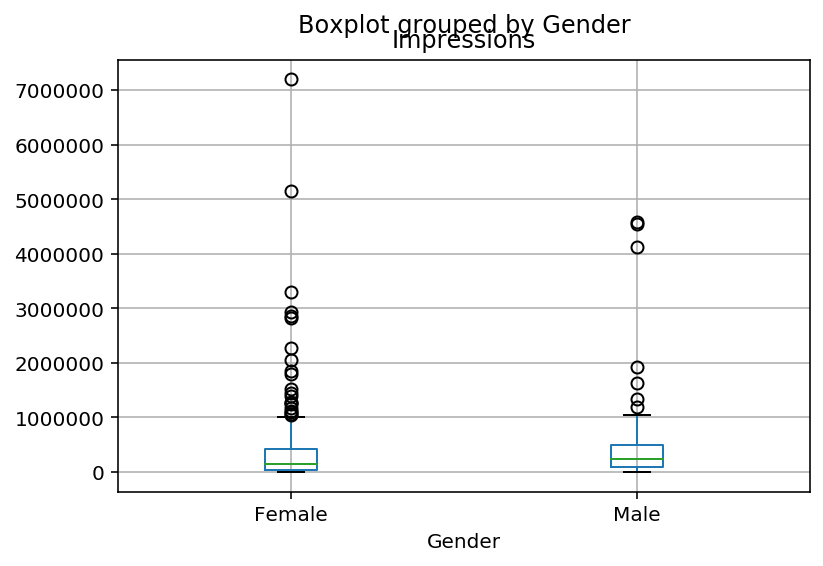

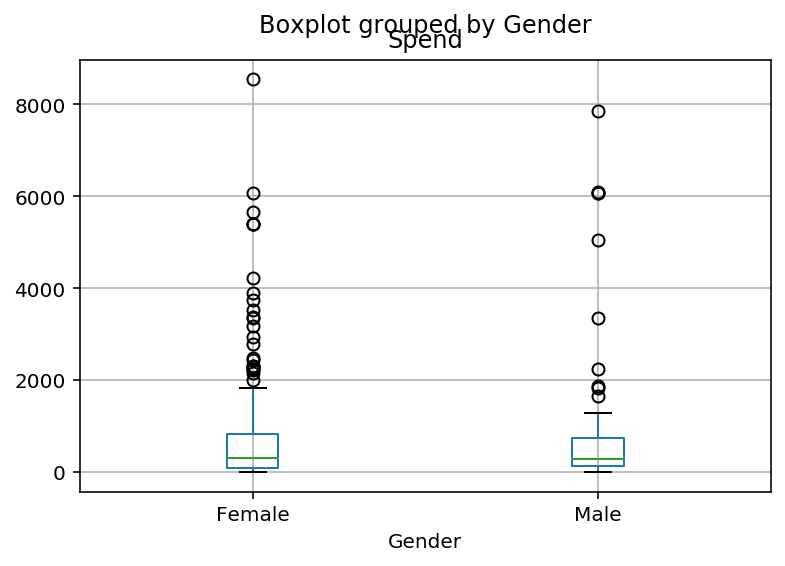

In [339]:
#EDA SECTION
#Showing counts between gender columns and the proportion between one another in a table format.
proportion = df2['Gender'].value_counts()/df2.shape[0]
uni = pd.DataFrame()
uni['Proportion'] = proportion
uni['Frequency'] = df2['Gender'].value_counts()
display(uni)

#Specifically looking at single gender targetted campaigns. Looking at the main metrics of performance and costs
#with impressions and spend columns. This is in order to gauge a comparison between the two in spread and locality
#of the data
male_desc = df2.loc[df2['Gender'] == 'Male'].describe().iloc[:,0:2]
female_desc = df2.loc[df2['Gender'] == 'Female'].describe().iloc[:,0:2]

total_desc = female_desc.merge(male_desc, left_index = True, right_index = True, suffixes = ['_Female', '_Male'])
cols = ['Spend_Female', 'Spend_Male', 'Impressions_Female', 'Impressions_Male']
total_desc = total_desc[cols]
display(total_desc)

# Used boxplot for impressions and spend by gender in order to demonstrate a visualization of the spread and locality
# of the data.
boxplot_imp = only_targetted.boxplot(column = 'Impressions', by = 'Gender')
boxplot_spend = only_targetted.boxplot(column = 'Spend', by ='Gender')

In [6]:
df

,ADID,CreativeUrl,Currency Code,Spend,Impressions,StartDate,EndDate,OrganizationName,BillingAddress,CandidateBallotInformation,PayingAdvertiserName,Gender,AgeBracket,CountryCode,Regions (Included),Regions (Excluded),Electoral Districts (Included),Electoral Districts (Excluded),Radius Targeting (Included),Radius Targeting (Excluded),Metros (Included),Metros (Excluded),Postal Codes (Included),Postal Codes (Excluded),Location Categories (Included),Location Categories (Excluded),Interests,OsType,Segments,Language,AdvancedDemographics,Targeting Connection Type,Targeting Carrier (ISP),CreativeProperties
0,6f6f6abb25d183bc3f0a2df46d18c65a18f6e1cac73416...,https://www.snap.com/political-ads/asset/a213d...,USD,35,16678,2018-11-06 18:21:20,2018-11-07 01:19:08,Research Triangle Student Advocacy,US,NaN,ResTri Student Advocacy,FEMALE,18-34,united states,NaN,NaN,NaN,NaN,NaN,NaN,Greensboro - High Point - Winston Salem,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,NaN
1,5195d68c146526eda7c30c64b9bef15ae86d8250c9a226...,https://www.snap.com/political-ads/asset/5c0b7...,USD,6,4846,2018-12-01 17:37:10,2018-12-11 05:37:02,LPM,GB,NaN,sdm.ng,MALE,30+,nigeria,Lagos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:http://jidesanwoolu.ng/
2,64d906646b616c034c91b69b9e7851944844eb456dd203...,https://www.snap.com/political-ads/asset/e56c0...,USD,56,11770,2018-09-28 23:10:14,2018-10-17 02:00:00,Chong and Koster,"1640 Rhode Island Ave. NW, Suite 600,Washingto...",NaN,Voter Participation Center,FEMALE,18+,united states,Minnesota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Provided by Advertiser,NaN,Marital Status (Single),NaN,NaN,web_view_url:https://www.voterparticipation.or...
3,45d7697e2522ccdd56b699e832792b9b659f7159e180a2...,https://www.snap.com/political-ads/asset/4b9c0...,USD,2048,612521,2018-09-28 19:00:00,2018-10-27 03:59:00,Güd Marketing,"1223 Turner Ave., Suite 101,Lansing,48906,US",NaN,Block Asian Carp,NaN,18+,united states,NaN,Indiana,NaN,NaN,NaN,NaN,Chicago,NaN,NaN,NaN,NaN,NaN,"Adventure Seekers,Beachgoers & Surfers,Cycling...",NaN,Provided by Advertiser,en,NaN,NaN,NaN,web_view_url:https://blockasiancarp.org/take-a...
4,46d8326f706f56296fa29f51b5127c67190807ccc08534...,https://www.snap.com/political-ads/asset/f512d...,USD,196,23810,2018-10-26 17:58:01,2018-11-06 22:59:59,Mothership Strategies,"1328 Florida Avenue NW, Building C, Washington...",NaN,Progressive Turnout Project,NaN,18+,united states,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,web_view_url:http://votingmatters.org/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4263,400029cda9002ff5bf0748dff9d4dd4931604d665af453...,https://www.snap.com/political-ads/asset/5f95a...,USD,2,268,2019-05-22 04:00:00,2019-06-14 19:59:59,Blueprint Interactive,"1730 Rhode Island Ave NW Suite 1014,Washington...",NaN,Brady Campaign,NaN,18+,united states,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,web_view_url:https://secure.everyaction.com/Tl...
4264,5ff9b0e3b04506623c9fbc117f483f74d082fa437fbd00...,https://www.snap.com/political-ads/asset/210a7...,CAD,1291,635404,2019-06-03 07:00:00,2019-09-04 06:59:59,The Aber Group,"202-120 Eglinton Avenue East,Toronto,M4P1E2,CA",NaN,Plan International Canada,FEMALE,34-,canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Advocates & Activists,Arts & Culture Mavens,Be...",NaN,NaN,en,NaN,NaN,NaN,web_view_url:https://plancanada.ca/ChangeTheBi...
4265,94bcf16c314bf7859ccb2f30facf6b6b7b4c3b0386efdc...,https://www.snap.com/political-ads/asset/f5477...,CAD,38409,23472181,2019-05-24 15:37:08,2019-07-01 03:59:59,Cossette Media Inc,"P.O. Box. 11613, Succ. Centre-ville,Montreal,H...",NaN,Government of Canada,NaN,18-,canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Provided by Advertiser,en,NaN,NaN,NaN,web_view_url:https://www.ca

Gender,Female,Male
StartingMonth,,
2018-06,5.234792e+05,0.000000e+00
2018-07,3.297598e+05,1.234960e+05
2018-08,1.770692e+05,9.426560e+05
2018-09,2.492247e+04,8.208300e+04
2018-10,4.757079e+05,1.341139e+06
2018-11,1.380371e+04,0.000000e+00
2018-12,1.055000e+04,4.203450e+04
2019-01,3.633785e+05,0.000000e+00
2019-02,1.404854e+05,4.124819e+06


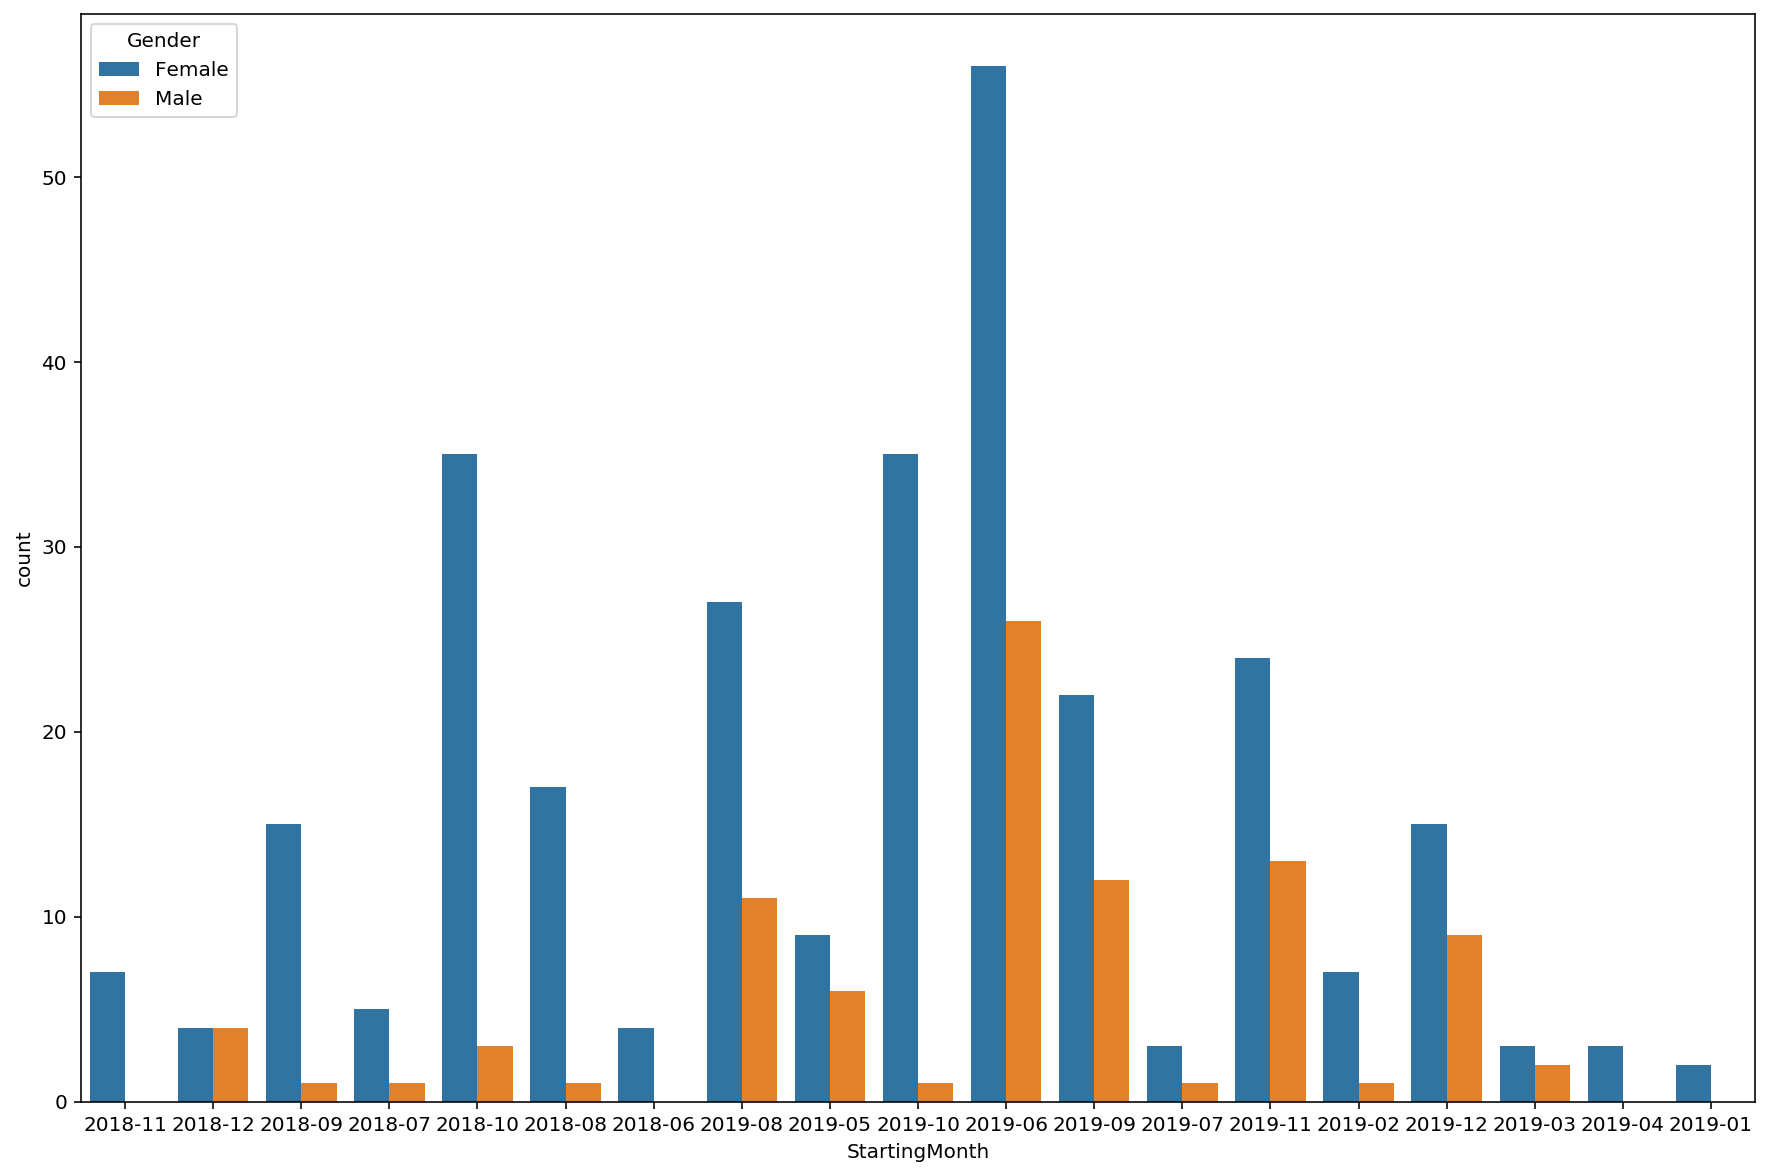

In [340]:
##### Bivariate Analysis looking at time through months and the impressions split by gender. I used a pivot table in
# order to make the comparison between female and male readable. Dates were used to scope out whether there
# was a difference between different times of the year and whether the analysis above portrays the results accurately.
# This is a form of increasing granularity of the data and analyzing more indepth to the differences between the two
# genders.
cnts = only_targetted.pivot_table(
    values  = "Impressions",
    index   = "StartingMonth",
    columns = "Gender",
    aggfunc = "mean",
    fill_value = 0.0
)
display(cnts)

#plot a countplot in order to see the distribution of the data and when these campaigns were happening.
plt.figure(figsize=(15,10))
timeplot = sns.countplot(x = 'StartingMonth', data = only_targetted, hue='Gender')

In [341]:
# Tabular format that analyzed the mean impressions split by gender and country. Another form of increasing granularity
# and trying to understand if there are possible dependancies on other variables, such as location and time.
only_targetted.groupby(['Country','Gender']).agg({'Impressions': 'mean'})

Impressions
Country        Gender              
Australia      Female  1.237212e+05
               Male    1.104330e+05
Canada         Female  4.625642e+05
               Male    2.796260e+05
Denmark        Female  3.234310e+05
               Male    3.390859e+05
Finland        Female  6.264427e+05
France         Female  4.534395e+06
Nigeria        Male    1.923500e+04
Norway         Female  1.402501e+05
               Male    2.179210e+05
Poland         Female  1.949614e+04
Sweden         Female  2.614770e+05
United Kingdom Female  3.951458e+05
               Male    1.626496e+06
United States  Female  2.443535e+05
               Male    5.870520e+05

### Assessment of Missingness

In [342]:
#Calculating the observed TVD value from the observed values in the dataset.
distr = (
    df2
    .assign(is_null=df2.CandidateBallotInformation.isnull())
    .pivot_table(index='is_null', columns='Gender', aggfunc='size')
    .apply(lambda x:x / x.sum(), axis=1)
)
distr = distr.fillna(0)
obs = distr.diff().iloc[-1].abs().sum() / 2
obs

0.07778789862704358

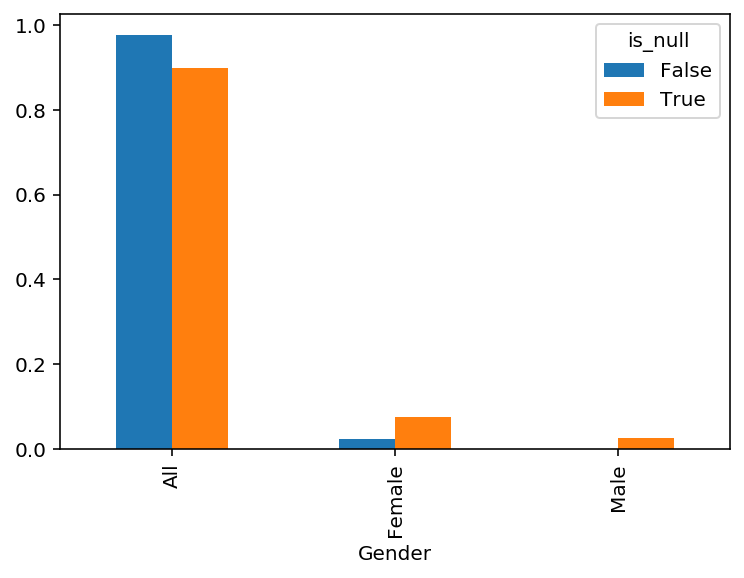

In [343]:
#Distribution between null values and non-null values. Barplot to demonstrate certain discrepancies 
#between the categories.
distr.T.plot(kind='bar');

The p-value for this analysis is 0.0


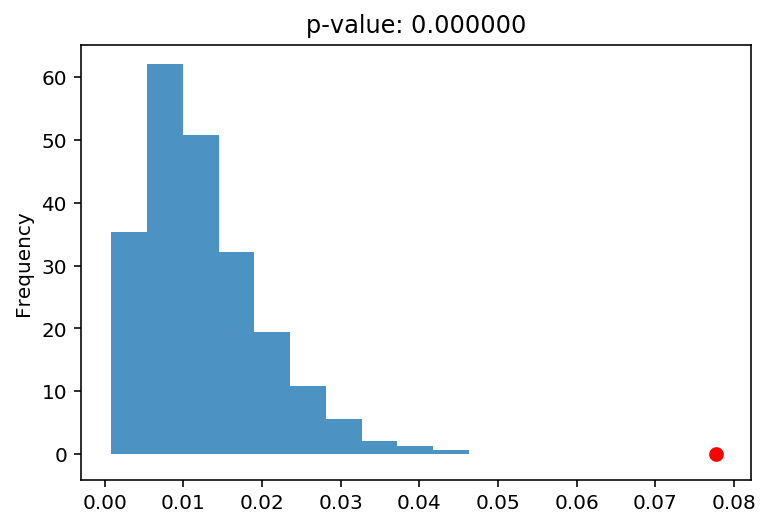

In [344]:
# Number of repetitions
n_repetitions = 1000
#array for tvds sample value
tvds = []
#for looping for each sample
for _ in range(n_repetitions):
    #randomly shuffling and sampling the gender column
    shuffled_col = (
        df2['Gender']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    #creating columns for whether values are null or not for Candidate Ballot info.
    shuffled = (
        df2
        .assign(**{
            'Gender': shuffled_col,
            'is_null': df2['CandidateBallotInformation'].isnull()
        })
    )
    #calculating tvd value.
    shuffled = (
        shuffled
        .pivot_table(index='is_null', columns='Gender', aggfunc='size')
        .apply(lambda x:x / x.sum(), axis=1)
    )
    
    tvd = shuffled.diff().iloc[-1].abs().sum() / 2
    
    tvds.append(tvd)
tvds
#pval
pval = np.mean(tvds > obs)
print("The p-value for this analysis is " + str(pval))
#histogram plot to emphasise where the observed value lies within the randomly shuffled sample values.
pd.Series(tvds).plot(kind='hist', density=True, alpha=0.8, title='p-value: %f' % pval)
plt.scatter(obs, 0, color='red', s=40);

### Hypothesis Test

The p-value for this analysis is 0.879


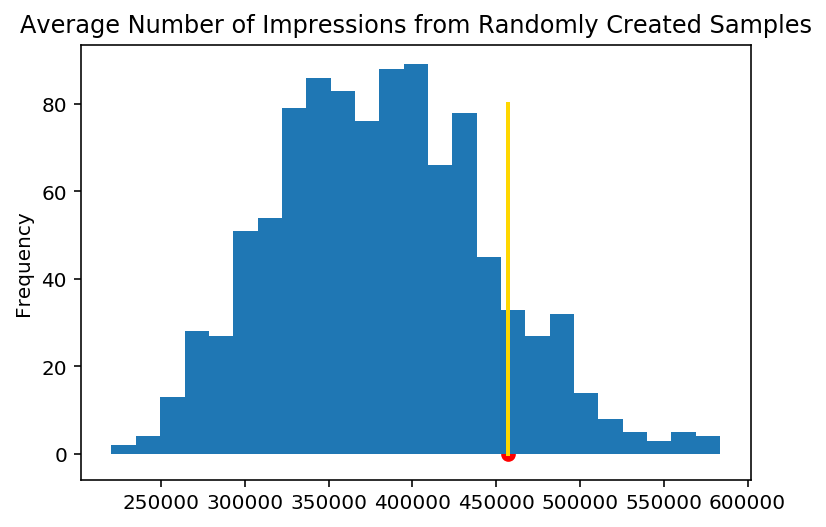

In [345]:
#Calculating observed value with average impressions given to male targetted campaigns.
observed_avg = only_targetted.loc[only_targetted['Gender'] == 'Male', 'Impressions'].mean()
#calculating sample size
size = only_targetted.loc[only_targetted['Gender'] == 'Male'].shape[0]
N =  1000
averages = []

#for looping to sample with sample size and calculating a sample mean.
for i in np.arange(N):
    random_sample = only_targetted.sample(int(size), replace=False)
    new_average = np.mean(random_sample['Impressions'])
    averages.append(new_average)
averages = np.array(averages)

#plotting histogram in order to demonstrate distribution of samples and where the observed value lies.
pd.Series(averages, name='Average').plot(
    kind='hist', 
    bins=25,
    title='Average Number of Impressions from Randomly Created Samples'
)
plt.scatter(observed_avg, 0, color='red', s=40);
print("The p-value for this analysis is " + str(np.count_nonzero(averages <= observed_avg) / N))
plt.plot([observed_avg, observed_avg], [0, 80], color='gold', lw=2);